## Part A: Subreddit Prediction ##

In [216]:
subreddit_train = "coursework_subreddit_train.json"
subreddit_test = "coursework_subreddit_test.json"

!gsutil cp gs://textasdata/coursework/coursework_subreddit_train.json $subreddit_train 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_test.json  $subreddit_test


Copying gs://textasdata/coursework/coursework_subreddit_train.json...
/ [1 files][ 10.1 MiB/ 10.1 MiB]                                                
Operation completed over 1 objects/10.1 MiB.                                     
Copying gs://textasdata/coursework/coursework_subreddit_test.json...
/ [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      


## part A1

In [217]:
import pandas as pd
import json

# A temporary variable to store the list of post content.
posts_tmp = list()

with open(subreddit_train) as jsonfile:
  for i, line in enumerate(jsonfile):
    thread = json.loads(line)
    for post in thread['posts']:
      # Keep the thread title and subreddit with each post.
      posts_tmp.append((thread['title'], post.get("author"), post.get('body')))
print(len(posts_tmp))#
# Create the posts data frame.  
labels = ['title', 'author', 'body']
post_frame = pd.DataFrame(posts_tmp, columns=labels)


15247


In [0]:
# import gzip

a=[]
b=[]
c=[]
for i,title,author,body in post_frame.itertuples(index=True, name='Pandas'):
  if title in a:
    if author!=None and body!=None:
      b[a.index(title)].append(author)
      c[a.index(title)].append(body)
    if author==None and body!=None:
      b[a.index(title)].append("None")
      c[a.index(title)].append(body)
    if author!=None and body==None:
      b[a.index(title)].append(author)
      c[a.index(title)].append("None")
    if author==None and body==None:
      b[a.index(title)].append("None")
      c[a.index(title)].append("None")
    
  else:    
    
    
    if author==None and body!=None:
      a.append(title)
      c.append([body])
      b.append(["None"])
    
    
    
    if author!=None and body!=None:
      a.append(title)
      c.append([body])
      b.append([author])

    if author!=None and body==None:
      a.append(title)
      c.append(["None"])
      b.append([author])
      
    
author=[]
body=[]
for i in b:
  author.append(" ".join(i))
for i in c:
  body.append(" ".join(i))  
df=pd.DataFrame()
df["title"]=a
df["author"]=author
df["body"]=body

post_frame=df

# groupby_gender = post_frame.groupby("subreddit").agg("body")
# groupby_gender.sum()
# groupby_gender1 = post_frame.groupby(["body","title"])["id"]
# groupby_gender1.sum()

# pd.DataFrame(groupby_gender1.sum(),columns=["id", "body", "title" ])

# for subreddit, body in groupby_gender['body']:
#   print((subreddit, body))
  
  
  #data[data['Gender'] == 'Female']['VIQ'].mean()
# import json
# import pandas as pd

# review_list = list()


# # Construct a dataframe, by opening the JSON file line-by-line
# with gzip.open(subreddit_train) as jsonfile:
#   for i, line in enumerate(jsonfile):
#     review = json.loads(line)
#     print(review)
#     if (i >= review_limit): break
#     #asin is the product number, overall is the number of stars awarded by the user for that product
#     review_list.append( (review['asin'], review['reviewerID'], review['reviewText'], review['summary'], review['overall']))
                   
# print("We have %d reviews in our dataset"  % len(review_list))

# collabels = ['productId', 'reviewerID', 'reviewText', 'summary', 'overall']
# reviews = pd.DataFrame(review_list, columns=collabels)



In [226]:
posts_test = list()

with open(subreddit_test) as jsonfile:
  for i, line in enumerate(jsonfile):
    thread = json.loads(line)
    for post in thread['posts']:
      # Keep the thread title and subreddit with each post.
      posts_test.append((thread['title'], post.get("author"), post.get('body')))
print(len(posts_test))#
# Create the posts data frame.  
labels = ['title', 'author', 'body']
post_frametest = pd.DataFrame(posts_test, columns=labels)


4016


In [0]:
post_frame

In [0]:
a=[]
b=[]
c=[]
for i,title,author,body in post_frametest.itertuples(index=True, name='Pandas'):
  
  
  
  
  if title in a:
    if author!=None and body!=None:
      b[a.index(title)].append(author)
      c[a.index(title)].append(body)
      
    if author==None and body==None:
      b[a.index(title)].append("None")
      c[a.index(title)].append("None")
    
      
    if author==None and body!=None:
      b[a.index(title)].append("None")
      c[a.index(title)].append(body)
    if author!=None and body==None:
      
      b[a.index(title)].append(author)
      c[a.index(title)].append("None")

  else:    
    
    
    if author==None and body!=None:
      a.append(title)
      c.append([body])
      b.append(["None"])
    
    if author!=None and body!=None:
      a.append(title)
      c.append([body])
      b.append([author])

    if author!=None and body==None:
      a.append(title)
      c.append(["None"])
      b.append([author])
      
    
author=[]
body=[]
for i in b:
  author.append(" ".join(i))
for i in c:
  body.append(" ".join(i))  
df1=pd.DataFrame()
df1["title"]=a
df1["author"]=author
df1["body"]=body

post_frametest=df1


In [0]:
import pandas as pd
#post_frame
#train_data
train_threads = pd.read_json(path_or_buf=subreddit_train, lines=True)
print(list(train_threads.columns.values))
print(train_threads)
#print(train_threads.size)


In [0]:
test_threads = pd.read_json(path_or_buf=subreddit_test, lines=True)
print(test_threads.head())
print(test_threads.size)



   is_self_post                                              posts  \
0           1.0  [{'body': 'Was watching a VOD from last years ...   
1           1.0  [{'body': 'Basically what the title says.', 'u...   
2           1.0  [{'body': '', 'author': 'Daft-Punk', 'url': 'h...   
3           1.0  [{'body': 'I start running this year. I do it ...   
4           1.0  [{'body': '[deleted]', 'url': 'https://www.red...   

       subreddit                                              title  \
0      starcraft  Just a reminder on how much SC2 has evolved th...   
1    whowouldwin  Your Favorite Hero Now Has A Healing Factor As...   
2      askreddit  If you could live anywhere in the world, where...   
3      askreddit                   Do you ever get use to exercise?   
4  tipofmytongue         [TOMT] [book] A scary french book for kids   

                                                 url  
0  https://www.reddit.com/r/starcraft/comments/mq...  
1  https://www.reddit.com/r/whowouldwin/co

In [230]:
subreddit_counts = train_threads['subreddit'].value_counts()
print(subreddit_counts.describe())
top_subbreddits = subreddit_counts.nlargest(20)
top_subbreddits_list = top_subbreddits.index.tolist()
#print(top_subbreddits)

count     20.000000
mean      72.800000
std       73.368285
min       28.000000
25%       36.250000
50%       45.500000
75%       63.750000
max      334.000000
Name: subreddit, dtype: float64


In [231]:
train_labels = train_threads['subreddit']
test_labels = test_threads['subreddit']
len(train_labels)

1456

In [0]:
# random_reviews = train_threads.sample(frac=1)
# # You may change this, but it's set to not be "due big".
# review_limit = min(400000, len(random_reviews))
# random_reviews = random_reviews.iloc[:review_limit, :]

# # 1. Split the data 80/20 train/test
# train_split = int(len(random_reviews) * 0.8)
# tmp_train = random_reviews.iloc[:train_split,:]
# test_data = random_reviews.iloc[train_split:,:]

# # 2. Split the train data into a train/validation split that's 80% train, 20% developemnt 
# validation_split = int(train_split * 0.8)
# train_data = tmp_train.iloc[:validation_split,:]
# validation_data = tmp_train.iloc[validation_split:,:]


In [232]:
import spacy

# Load the medium english model. 
# We will use this model to get embedding features for tokens later.
!python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_md', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
# Download a stopword list
import nltk
nltk.download('stopwords')


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# def create_label(x):
#     if x > 3:
#         return 1 # 'positive' 
#     return 0 # 'negative'
  
# post_frame['Class'] = post_frame.overall.apply(create_label)

In [0]:
#@Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

#@Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens
  return normalized_tokens

#@Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

In [0]:
tokenize_normalize("the app is fun. very happy.")


['the', 'app', 'is', 'fun', 'very', 'happy']

** Bernoulli Naive Bayes **




In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels,average="macro")
  recall = recall_score(predictions, true_labels,average="macro")
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1,average="macro") #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.


In [0]:
  #print(nb_model.predict(train_features))


Logistic regresison 

In [0]:
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(solver='saga')
#lr_model = lr.fit(train_features, train_labels)




In [0]:
#lr_model.score(train_features, train_labels)

#evaluation_summary("LR onehot",  lr_model.predict(test_features), test_labels)

In [0]:
#lr_model.score(train_features, train_labels)
#evaluation_summary("LR onehot", lr_model.predict(train_features), train_labels)

## Pipeline

---



---

STARTING LOGISTIC


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [0]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Use FeatureUnion to combine the features from text and summary
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
             ('name', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
              
        ])
        )
    ])





In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

prediction_pipelineno = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
             ('name', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
        ])
        )
    ])


In [0]:
one_hot_train_features = prediction_pipeline.fit_transform(post_frame)
#one_hot_validation_features = prediction_pipeline.transform(validation_data)
one_hot_test_features = prediction_pipeline.transform(post_frametest)

In [0]:
one_hot_train_featuresno = prediction_pipelineno.fit_transform(post_frame)
#one_hot_validation_features = prediction_pipeline.transform(validation_data)
one_hot_test_featuresno = prediction_pipelineno.transform(post_frametest)


In [241]:
lr = LogisticRegression(solver='saga')
combined_model = lr.fit(one_hot_train_features,train_labels)
evaluation_summary("LR TFIDF", lr.predict(one_hot_test_features), test_labels)     ###best classifier 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Evaluation for: LR TFIDF
Classifier 'LR TFIDF' has Acc=0.685 P=0.578 R=0.725 F1=0.607
                      precision    recall  f1-score   support

           askreddit      0.917     0.642     0.755       120
             atheism      0.417     0.833     0.556         6
            buildapc      0.784     0.784     0.784        37
electronic_cigarette      0.889     0.800     0.842        10
   explainlikeimfive      0.786     0.688     0.733        16
              gaming      0.471     0.421     0.444        19
         hearthstone      0.467     1.000     0.636         7
           jailbreak      0.545     0.750     0.632         8
     leagueoflegends      0.896     0.581     0.705        74
              movies      0.400     1.000     0.571         2
        pcmasterrace      0.217     0.833     0.345         6
     personalfinance      0.900     1.000     0.947         9
          reddit.com      0.000     0.000     0.000         0
       relationships      1.000     0.857    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Confusion matrix 

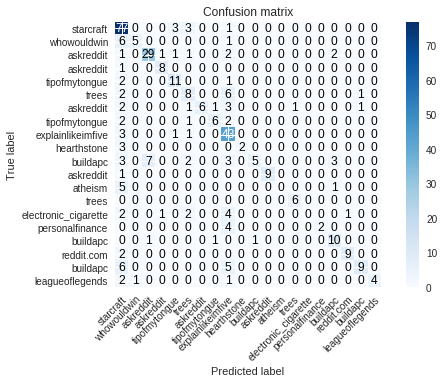

In [0]:
# Create Confusion Matrix

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# lr = LogisticRegression(solver='saga')
# combined_model = lr.fit(one_hot_train_features,train_labels)
# evaluation_summary("LR TFIDF", lr.predict(one_hot_test_features), test_labels)  
plot_confusion_matrix(test_labels, lr.predict(one_hot_test_features), test_labels, title='Confusion matrix')
plt.show()

In [0]:
lr = LogisticRegression(solver='saga')
combined_model = lr.fit(one_hot_train_features,train_labels)
#evaluation_summary("LR TFIDF", lr.predict(one_hot_train_features), train_labels)   

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Starting TF

In [0]:
lr = LogisticRegression(solver='saga')
combined_model = lr.fit(one_hot_train_featuresno,train_labels)
#evaluation_summary("LR TFIDF", lr.predict(one_hot_train_featuresno), train_labels)   

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
lr = LogisticRegression()
combined_model = lr.fit(one_hot_train_featuresno,train_labels)
evaluation_summary("LR TFIDF", lr.predict(one_hot_test_featuresno), test_labels)     

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Evaluation for: LR TFIDF
Classifier 'LR TFIDF' has Acc=0.545 P=0.345 R=0.606 F1=0.387
                      precision    recall  f1-score   support

           askreddit      0.976     0.414     0.582       198
             atheism      0.000     0.000     0.000         0
            buildapc      0.811     0.789     0.800        38
electronic_cigarette      0.444     0.800     0.571         5
   explainlikeimfive      0.500     0.778     0.609         9
              gaming      0.118     0.500     0.190         4
         hearthstone      0.133     1.000     0.235         2
           jailbreak      0.273     1.000     0.429         3
     leagueoflegends      0.750     0.529     0.621        68
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.174     0.667     0.276         6
     personalfinance      0.600     1.000     0.750         6
          reddit.com      0.000     0.000     0.000         0
       relationships      0.667     1.000    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


SVMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM



---



---




In [0]:
 from sklearn import svm
X = [[0, 0], [1, 1]]
 y = [0, 1]
 clf = svm.SVC(gamma='scale',kernel='rbf')
 clf.fit(one_hot_train_features,train_labels)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
#evaluation_summary("SVM HOT", clf.predict(one_hot_train_features), train_labels)     

In [0]:
evaluation_summary("SVM HOT", clf.predict(one_hot_test_features), test_labels)     

Evaluation for: SVM HOT
Classifier 'SVM HOT' has Acc=0.449 P=0.196 R=0.293 F1=0.189
                      precision    recall  f1-score   support

           askreddit      0.964     0.382     0.547       212
             atheism      0.000     0.000     0.000         0
            buildapc      0.676     0.781     0.725        32
electronic_cigarette      0.333     1.000     0.500         3
   explainlikeimfive      0.143     0.667     0.235         3
              gaming      0.000     0.000     0.000         0
         hearthstone      0.000     0.000     0.000         0
           jailbreak      0.000     0.000     0.000         0
     leagueoflegends      0.917     0.431     0.587       102
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.000     0.000     0.000         0
     personalfinance      0.000     0.000     0.000         0
          reddit.com      0.000     0.000     0.000         0
       relationships      0.333     1.000     0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
#evaluation_summary("SVM tf", clf.predict(one_hot_train_featuresno), train_labels)     

In [0]:
evaluation_summary("SVM tf", clf.predict(one_hot_test_featuresno), test_labels)     

Evaluation for: SVM tf
Classifier 'SVM tf' has Acc=0.301 P=0.083 R=0.032 F1=0.045
                      precision    recall  f1-score   support

           askreddit      0.833     0.446     0.581       157
             atheism      0.000     0.000     0.000         0
            buildapc      0.000     0.000     0.000         0
electronic_cigarette      0.000     0.000     0.000         0
   explainlikeimfive      0.000     0.000     0.000         0
              gaming      0.000     0.000     0.000         0
         hearthstone      0.000     0.000     0.000         0
           jailbreak      0.000     0.000     0.000         0
     leagueoflegends      0.833     0.192     0.312       208
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.000     0.000     0.000         0
     personalfinance      0.000     0.000     0.000         0
          reddit.com      0.000     0.000     0.000         0
       relationships      0.000     0.000     0.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
from sklearn.dummy import DummyClassifier

dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(one_hot_train_features, train_labels)
print(dummy_prior.score(one_hot_test_features, test_labels))
evaluation_summary("Dummy Prior", dummy_prior.predict(one_hot_test_features), test_labels)

dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(one_hot_train_features, train_labels)
print(dummy_mf.score(one_hot_test_features, test_labels))
evaluation_summary("Dummy Majority", dummy_mf.predict(one_hot_test_features), test_labels)


0.12876712328767123
Evaluation for: Dummy Prior
Classifier 'Dummy Prior' has Acc=0.112 P=0.075 R=0.075 F1=0.073
                      precision    recall  f1-score   support

           askreddit      0.214     0.250     0.231        72
             atheism      0.000     0.000     0.000        12
            buildapc      0.054     0.061     0.057        33
electronic_cigarette      0.111     0.083     0.095        12
   explainlikeimfive      0.143     0.069     0.093        29
              gaming      0.059     0.100     0.074        10
         hearthstone      0.000     0.000     0.000        12
           jailbreak      0.000     0.000     0.000         6
     leagueoflegends      0.167     0.163     0.165        49
              movies      0.000     0.000     0.000        11
        pcmasterrace      0.174     0.182     0.178        22
     personalfinance      0.000     0.000     0.000        12
          reddit.com      0.000     0.000     0.000        10
       relationship

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
dummy_prior1 = DummyClassifier(strategy='stratified')
dummy_prior1.fit(one_hot_train_featuresno, train_labels)
print(dummy_prior1.score(one_hot_test_featuresno, test_labels))
evaluation_summary("Dummy Prior", dummy_prior1.predict(one_hot_test_featuresno), test_labels)

dummy_mf1 = DummyClassifier(strategy='most_frequent')
dummy_mf1.fit(one_hot_train_featuresno, train_labels)
print(dummy_mf1.score(one_hot_test_featuresno, test_labels))
evaluation_summary("Dummy Majority", dummy_mf1.predict(one_hot_test_featuresno), test_labels)


0.09863013698630137
Evaluation for: Dummy Prior
Classifier 'Dummy Prior' has Acc=0.126 P=0.081 R=0.075 F1=0.076
                      precision    recall  f1-score   support

           askreddit      0.214     0.228     0.221        79
             atheism      0.000     0.000     0.000         5
            buildapc      0.216     0.222     0.219        36
electronic_cigarette      0.111     0.071     0.087        14
   explainlikeimfive      0.000     0.000     0.000        18
              gaming      0.235     0.200     0.216        20
         hearthstone      0.067     0.100     0.080        10
           jailbreak      0.091     0.111     0.100         9
     leagueoflegends      0.167     0.151     0.158        53
              movies      0.200     0.083     0.118        12
        pcmasterrace      0.000     0.000     0.000        12
     personalfinance      0.000     0.000     0.000         8
          reddit.com      0.000     0.000     0.000         5
       relationship

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)




---



---

RANDOM FORESTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(one_hot_train_features, train_labels)
#evaluation_summary("rf hot", rf.predict(one_hot_train_features), train_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rf = RandomForestClassifier()
rf.fit(one_hot_train_features, train_labels)
evaluation_summary("rf hot", rf.predict(one_hot_test_features), test_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Evaluation for: rf hot
Classifier 'rf hot' has Acc=0.499 P=0.312 R=0.539 F1=0.352
                      precision    recall  f1-score   support

           askreddit      0.905     0.404     0.559       188
             atheism      0.167     0.500     0.250         4
            buildapc      0.757     0.651     0.700        43
electronic_cigarette      0.556     0.625     0.588         8
   explainlikeimfive      0.214     0.429     0.286         7
              gaming      0.176     0.300     0.222        10
         hearthstone      0.267     0.500     0.348         8
           jailbreak      0.455     0.833     0.588         6
     leagueoflegends      0.750     0.581     0.655        62
              movies      0.200     1.000     0.333         1
        pcmasterrace      0.000     0.000     0.000         0
     personalfinance      0.500     1.000     0.667         5
          reddit.com      0.000     0.000     0.000         2
       relationships      0.500     1.000     0.6

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
rf1 = RandomForestClassifier()

rf1.fit(one_hot_train_featuresno, train_labels)
evaluation_summary("rf tf", rf.predict(one_hot_train_featuresno), train_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Evaluation for: rf tf
Classifier 'rf tf' has Acc=0.144 P=0.052 R=0.019 F1=0.016
                      precision    recall  f1-score   support

           askreddit      0.045     0.246     0.076        61
             atheism      0.000     0.000     0.000         0
            buildapc      0.000     0.000     0.000         0
electronic_cigarette      0.000     0.000     0.000         0
   explainlikeimfive      0.000     0.000     0.000         0
              gaming      0.000     0.000     0.000         0
         hearthstone      0.000     0.000     0.000         0
           jailbreak      0.000     0.000     0.000         0
     leagueoflegends      0.995     0.140     0.245      1395
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.000     0.000     0.000         0
     personalfinance      0.000     0.000     0.000         0
          reddit.com      0.000     0.000     0.000         0
       relationships      0.000     0.000     0.000

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:

evaluation_summary("rf tf", rf.predict(one_hot_test_featuresno), test_labels)


Evaluation for: rf tf
Classifier 'rf tf' has Acc=0.205 P=0.061 R=0.023 F1=0.031
                      precision    recall  f1-score   support

           askreddit      0.464     0.300     0.364       130
             atheism      0.000     0.000     0.000         0
            buildapc      0.000     0.000     0.000         0
electronic_cigarette      0.000     0.000     0.000         0
   explainlikeimfive      0.000     0.000     0.000         0
              gaming      0.000     0.000     0.000         0
         hearthstone      0.000     0.000     0.000         0
           jailbreak      0.000     0.000     0.000         0
     leagueoflegends      0.750     0.153     0.254       235
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.000     0.000     0.000         0
     personalfinance      0.000     0.000     0.000         0
          reddit.com      0.000     0.000     0.000         0
       relationships      0.000     0.000     0.000

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


bar chart 

---



---



In [0]:

  #print("Classifier F1=%0.3f" % (description,accuracy,precision,recall,f1))
 # print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.

# lr = LogisticRegression(solver='saga')
# combined_model = lr.fit(one_hot_train_features,train_labels)
# evaluation_summary1("LR TFIDF", lr.predict(one_hot_test_features), test_labels)     



In [0]:

sorted((pd.DataFrame(test_labels).subreddit.unique()))

['askreddit',
 'atheism',
 'buildapc',
 'electronic_cigarette',
 'explainlikeimfive',
 'gaming',
 'hearthstone',
 'jailbreak',
 'leagueoflegends',
 'movies',
 'pcmasterrace',
 'personalfinance',
 'reddit.com',
 'relationships',
 'starcraft',
 'summonerschool',
 'techsupport',
 'tipofmytongue',
 'trees',
 'whowouldwin']

  queation twoooooooooo

---



---



## PartA 2

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression



# prediction_pipeline = Pipeline([
#               ('selector', ItemSelector(key='body')),
#               ('one-hot', CountVectorizer(tokenizer=tokenize_normalize)),
#               ('logreg', LogisticRegression(solver='saga'))
#               ])




prediction_pipelineno = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,max_features=None,ngram_range=(1,1))), 
              ])),
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True,max_features=None,ngram_range=(1,1))), 
              ])),
             ('name', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,max_features=None,ngram_range=(1,1))), 
              ])),
              
        ])

        ),              
        ('logreg', LogisticRegression(solver='saga',C= 10, multi_class = "multinomial")),

    
    ])
                  


In [0]:
# from sklearn.model_selection import GridSearchCV
# params = {
#   'logreg__solver': ['saga',"sag","lbfgs"], 
#   'logreg__multi_class':["ovr", "multinomial", "auto"],
#   'logreg__C': (0.1 , 1,10,100 ,1000,10000),
#   "union__text__one-hot__ngram_range": ((0,3),(0,4),(1,1)),
#   "union__text__one-hot__max_features": (None,10,40,60),
#   "union__text__one-hot__sublinear_tf": (True,False),

#   "union__title__one-hot__ngram_range": ((0,3),(0,4),(1,1)),
#   "union__title__one-hot__max_features": (None,10,40,60),
#   "union__title__one-hot__sublinear_tf": (True,False),
  
#  "union__name__one-hot__ngram_range": ((0,3),(0,4),(1,1)),
#   "union__name__one-hot__max_features": (None,10,40,60),
#   "union__name__one-hot__sublinear_tf": (True,False)



# }
# grid_search = GridSearchCV(prediction_pipelineno, param_grid=params, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
# print("Performing grid search...")
# print("pipeline:", [name for name, _ in prediction_pipelineno.steps])
# print("parameters:")
# print(params)
# grid_search.fit(post_frame, train_labels)

# print("Best score: %0.3f" % grid_search.best_score_)
# print("Best parameters set:")
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(params.keys()):
#   print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [0]:

prediction_pipelineno.fit(post_frame, train_labels)
evaluation_summary("LR", prediction_pipelineno.predict(post_frametest), test_labels) 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Evaluation for: LR
Classifier 'LR' has Acc=0.647 P=0.504 R=0.649 F1=0.547
                      precision    recall  f1-score   support

           askreddit      0.940     0.506     0.658       156
             atheism      0.500     1.000     0.667         6
            buildapc      0.838     0.838     0.838        37
electronic_cigarette      0.778     0.875     0.824         8
   explainlikeimfive      0.714     0.769     0.741        13
              gaming      0.235     0.400     0.296        10
         hearthstone      0.467     1.000     0.636         7
           jailbreak      0.545     1.000     0.706         6
     leagueoflegends      0.750     0.679     0.713        53
              movies      0.000     0.000     0.000         1
        pcmasterrace      0.304     0.700     0.424        10
     personalfinance      0.800     1.000     0.889         8
          reddit.com      0.000     0.000     0.000         7
       relationships      0.833     1.000     0.909      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### error analysis 

In [0]:
def print_errors(labels, predictions, data):
  label_arr=labels.values
  for idx, prediction in enumerate(predictions):
    label=label_arr[idx]
    if prediction != label:
      print(post_frametest.iloc[idx,1], label, prediction, "                        " ,'label:', label,"              ", 'prediction:', prediction)

In [0]:

print_errors(test_labels, prediction_pipelineno.predict(post_frametest), post_frametest)

MeisterKarl smsy vehemus NruJaC starcraft gaming                          label: starcraft                prediction: gaming
duel_dude Knotfloyd KuronekoKawaii vishnukg randooooom vishnukg Briansama gaahl666 MasterofPandas1 srekcornaivaf Defazioyo trees askreddit                          label: trees                prediction: askreddit
Orconem None Hjelpen wpScraps hearthstone reddit.com                          label: hearthstone                prediction: reddit.com
jakedebest None jakedebest None jakedebest jakedebest None buildapc askreddit                          label: buildapc                prediction: askreddit
Character_T Viin etbob623 shazang zzorga PseudoMcJudo Roryrooster 258joe007 twitch1982 osgrug Golemfrost jakeross Sumogon atheism askreddit                          label: atheism                prediction: askreddit
twoscoop BuffaloLP twoscoop None JaxXx_oL20 None twoscoop buildapc askreddit                          label: buildapc                prediction: askreddi



---



---

QUESTION THREEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE

In [0]:
#post_frame.iloc[:,2]


post_frame1 = post_frame
post_frametest1 =post_frametest
# post_frame1["body_length"]= post_frame1.apply(lambda row: str(len(row.body)), axis=1)
# post_frametest1["body_length"]= post_frametest1.apply(lambda row: str(len(row.body)), axis=1)


# #post_frametest1
# post_frame.drop(["body_length"], axis=1)


VaderSentiment for emtionas

In [0]:
# x = "noob"
# if "noob" in post_frame.iloc[1,2]:
#    print ("success")
# post_frame.iloc[34,2]
#range(len((post_frame)))

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentence = "im feeling good"
sentence1 = "i wanna to kill myself"
sentence2 = "why cant i make it work"
vs = analyzer.polarity_scores(post_frame1.iloc[2,2])
vs=analyzer.polarity_scores(sentence1)
print(vs)


{'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compound': -0.6908}


vaderSentiment

In [0]:

#!pip install vaderSentiment
#adding emotions 

y = list()
t = list(range(0,len(post_frame1)))
d = list(range(0,len(post_frame1)))

for i in range(len(post_frame1)):
  t[i] = analyzer.polarity_scores(post_frame1.iloc[i,2])
  if t[i]['compound'] >= 0.05:
     d[i] = "positive"
      
  elif t[i]['compound'] <=  -0.05:
     d[i] = "negative"
      
  else: 
    d[i] = "neutral"
    #print('Success!')
  y.append(d[i])

post_frame1["mood"]= y

#okenize_normalize(vs)
# Example code:
# for i in range(len(post_frame1)):
#     vs = analyzer.polarity_scores(post_frame1.iloc[i,2])
#     print("{:-<65} {}".format(post_frame1.iloc[i,2], str(vs)))

In [0]:
y1 = list()
t1 = list(range(0,len(post_frametest1)))
d1 = list(range(0,len(post_frametest1)))

for i in range(len(post_frametest1)):
  t1[i] = analyzer.polarity_scores(post_frametest1.iloc[i,2])
  if t1[i]['compound'] >= 0.05:
     d1[i] = "positive"
      
  elif t1[i]['compound'] <=  -0.05:
     d1[i] = "negative"
      
  else: 
    d1[i] = "neutral"
    #print('Success!')
  y1.append(d1[i])

post_frametest1["mood"]= y1


token search 

In [0]:
x = list()
l= list(range(0,len(post_frame1)))

for i in range(len(post_frame1)):
  if 'riot' in post_frame1.iloc[i,2]:
    l[i] = 1
  elif "Riot" in post_frame1.iloc[i,2]:
    l[i] = 1
  elif "LCS" in post_frame1.iloc[i,2]:
    l[i] = 1
  elif "lcs" in post_frame1.iloc[i,2]:
    l[i] = 1
  elif "jungler" in post_frame1.iloc[i,2]:
    l[i] = 1
  elif "laner" in post_frame1.iloc[i,2]:
    l[i] = 1
  else: 
    l[i] = 0
    #print('Success!')
  x.append(str(l[i]))  
  
    
print(len([i for i, e in enumerate(x) if e == str(1)]))
post_frame1["League"]= x
post_frame1 =pd.DataFrame(post_frame)
#post_frame1




130


In [0]:
x1 = list()
l1= list(range(0,len(post_frametest1)))

for i in range(len(post_frametest1)):
  if 'riot' in post_frametest1.iloc[i,2]:
    l1[i] = 1
  elif "Riot" in post_frametest1.iloc[i,2]:
    l1[i] = 1
  elif "LCS" in post_frametest1.iloc[i,2]:
    l1[i] = 1
  elif "lcs" in post_frametest1.iloc[i,2]:
    l1[i] = 1
  elif "jungler" in post_frametest1.iloc[i,2]:
    l1[i] = 1
  elif "laner" in post_frame1.iloc[i,2]:
    l[i] = 1
  else:
    l1[i] = 0
    #print('Success!')
  x1.append(str(l1[i]))  
len([i for i, e in enumerate(x1) if e == str(1)])
post_frametest1["League"]= x1
post_frametest1 = pd.DataFrame(post_frametest1)


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


prediction_pipelineno1 = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,max_features=None,ngram_range=(1,1))), 
              ])),
              
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True,max_features=None,ngram_range=(1,1))), 
              ])),
              
            ('name', Pipeline([
             ('selector', ItemSelector(key='author')),
             ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,max_features=None,ngram_range=(1,1))), 
             ])),
              
           ('mood', Pipeline([
            ('selector', ItemSelector(key='mood')),
            ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize)), 
            ])),
              
           ('league', Pipeline([
            ('selector', ItemSelector(key='League')),
            ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              
            ]))
              
              
        ])

        ),              
        ('logreg', LogisticRegression(solver='saga',C= 1000,multi_class = "multinomial")),

    
    ])

In [0]:
train_labels = train_threads['subreddit']
test_labels = test_threads['subreddit']
prediction_pipelineno1.fit(post_frame1, train_labels)
evaluation_summary("LR", prediction_pipelineno1.predict(post_frametest1), test_labels) 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Evaluation for: LR
Classifier 'LR' has Acc=0.693 P=0.591 R=0.674 F1=0.611
                      precision    recall  f1-score   support

           askreddit      0.917     0.575     0.706       134
             atheism      0.667     1.000     0.800         8
            buildapc      0.838     0.861     0.849        36
electronic_cigarette      0.889     0.800     0.842        10
   explainlikeimfive      0.786     0.688     0.733        16
              gaming      0.529     0.600     0.562        15
         hearthstone      0.533     1.000     0.696         8
           jailbreak      0.818     1.000     0.900         9
     leagueoflegends      0.729     0.833     0.778        42
              movies      0.200     0.500     0.286         2
        pcmasterrace      0.348     0.800     0.485        10
     personalfinance      0.900     1.000     0.947         9
          reddit.com      0.000     0.000     0.000         9
       relationships      1.000     0.857     0.923      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Part B: Discourse prediction ##

In [0]:
discourse_train = "coursework_discourse_train.json"
discourse_test = "coursework_discourse_test.json"
  
!gsutil cp gs://textasdata/coursework/coursework_discourse_train.json $discourse_train  
!gsutil cp gs://textasdata/coursework/coursework_discourse_test.json  $discourse_test

Copying gs://textasdata/coursework/coursework_discourse_train.json...
- [1 files][ 60.2 MiB/ 60.2 MiB]                                                
Operation completed over 1 objects/60.2 MiB.                                     
Copying gs://textasdata/coursework/coursework_discourse_test.json...
/ [1 files][ 15.1 MiB/ 15.1 MiB]                                                
Operation completed over 1 objects/15.1 MiB.                                     


In [0]:
# The reddit thread structure is nested with posts in a new content.
# This block reads the file as json and creates a new data frame.
import pandas as pd
import json

def load_posts(file):
  # A temporary variable to store the list of post content.
#   posts_tmp = list()

#   with open(file) as jsonfile:
#     for i, line in enumerate(jsonfile):
#      # if (i > 2): break
#       thread = json.loads(line)
#       for post in thread['posts']:
#         # NOTE: This could be changed to use additional features from the post or thread.
#         # DO NOT change the labels for the test set.
#         posts_tmp.append((thread['subreddit'], thread['title'], thread['url'],
#                         post['id'], post.get('author', ""), post.get('body', ""), post.get("majority_link", ""), 
#                         post.get('post_depth', 0), post.get('majority_type', ""), # discourse type label 
#                         post.get('in_reply_to', "") ))

# # Create the posts data frame.  
#   labels = ['subreddit', 'title', 'url', 'id', 'author', 'body', 'majority_link', 
#           'post_depth', 'discourse_type', 'in_reply_to']
  #########################################################################
 # return pd.DataFrame(posts_tmp, columns=labels)
  posts_tmp = list()

  with open(file) as jsonfile:
    for i, line in enumerate(jsonfile):
     # if (i > 2): break
      thread = json.loads(line)
      for post in thread['posts']:
        # NOTE: This could be changed to use additional features from the post or thread.
        # DO NOT change the labels for the test set.
        posts_tmp.append((thread['subreddit'], thread['title'],str(thread['is_self_post']),#str(post.get['is_self_post', ""]),
                     post.get('author', ""), post.get('body', ""), post.get('majority_type', ""),post.get("majority_link", ""),
                          post.get('in_reply_to', ""), (post.get("is_first_post"))
                       ))

# Create the posts data frame.  
  labels = ['subreddit', 'title',"is_self_post", 'author', 'body', 
          "discourse_type","majority_link","in_reply_to","is_first_post"]
  return pd.DataFrame(posts_tmp, columns=labels)



In [0]:
train_posts = load_posts(discourse_train)
# Filter out empty labels
train_posts = train_posts[train_posts['discourse_type'] != ""]
print(train_posts.head())
print("Num posts: ", train_posts.size)


    subreddit                           title is_self_post        author  \
0  worldofpvp  Help me decide my new PvP main          1.0      TyrickEU   
1  worldofpvp  Help me decide my new PvP main          1.0          vurt   
2  worldofpvp  Help me decide my new PvP main          1.0   OptimusNice   
3  worldofpvp  Help me decide my new PvP main          1.0                 
4  worldofpvp  Help me decide my new PvP main          1.0  Rageinjector   

                                                body discourse_type  \
0  Hi. \nAs a raider previously, i had no problem...       question   
1  [deleted]  \n ^^^^^^^^^^^^^^^^0.5422 \n > [Wha...         answer   
2  This goes mostly for 3v3 since that seems to b...         answer   
3  Rets are in a good position right now, althoug...         answer   
4  Druid are the best pvp healer atm and are grea...         answer   

  majority_link in_reply_to is_first_post  
0          none                      True  
1     t3_2v0anq   t3_2v0anq 

In [0]:
(train_posts)

The label for the post we will be predicting is in the discourse_type column.

In [0]:
test_posts = load_posts(discourse_test)
# Filter out empty labels
test_posts = test_posts[test_posts['discourse_type'] != ""]
print("Num posts: ", test_posts.size)


Num posts:  178308


In [0]:
train_labels = train_posts['discourse_type']
test_labels = test_posts['discourse_type']


Examine the distribution over labels on the training data.

In [0]:
discourse_counts = train_labels.value_counts()
print(discourse_counts.describe())

top_discourse = discourse_counts.nlargest(200)
print(top_discourse)
top_discourse = top_discourse.index.tolist()
print(top_discourse)

count       10.000000
mean      7926.700000
std       9664.321866
min       1266.000000
25%       1671.500000
50%       3235.500000
75%      11919.750000
max      31419.000000
Name: discourse_type, dtype: float64
answer              31419
elaboration         14775
question            13610
appreciation         6849
agreement            3868
disagreement         2603
humor                1787
other                1633
announcement         1457
negativereaction     1266
Name: discourse_type, dtype: int64
['answer', 'elaboration', 'question', 'appreciation', 'agreement', 'disagreement', 'humor', 'other', 'announcement', 'negativereaction']


##QUESTION THREE

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
labels = ['subreddit', 'title', 'url', 'author', 'body', 'majority_link', 
           'discourse_type', 'in_reply_to']

prediction_pipelinetfq3 = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
#             ('subreddit', Pipeline([
#               ('selector', ItemSelector(key='subreddit')),
#               ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,ngram_range=(0,3))), 
#               ])),
              
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True)), 
              ])),
              
              
            ('name', Pipeline([
             ('selector', ItemSelector(key='author')),
             ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
                           #   ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,max_features=None,ngram_range=(1,1))), 

             ])),
              

     ##################extra         
               
              ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
           
              

              ('majority', Pipeline([
              ('selector', ItemSelector(key='majority_link')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
              ('reply', Pipeline([
              ('selector', ItemSelector(key='in_reply_to')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
              ('self', Pipeline([
              ('selector', ItemSelector(key='is_self_post')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
        ])

        ),              
        ('logreg', LogisticRegression(solver='saga',C= 1000,multi_class = "multinomial")),

    
    ])

In [0]:
prediction_pipelinetfq3.fit(train_posts, train_labels)
evaluation_summary( "LR", prediction_pipelinetfq3.predict(test_posts), test_labels) 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Evaluation for: LR
Classifier 'LR' has Acc=0.511 P=0.319 R=0.389 F1=0.340
                  precision    recall  f1-score   support

       agreement      0.223     0.360     0.275       589
    announcement      0.499     0.605     0.547       301
          answer      0.705     0.560     0.624      9985
    appreciation      0.580     0.651     0.614      1532
    disagreement      0.067     0.181     0.098       237
     elaboration      0.277     0.297     0.287      3375
           humor      0.053     0.189     0.082       127
negativereaction      0.081     0.194     0.115       129
           other      0.122     0.251     0.165       183
        question      0.584     0.596     0.590      3354

       micro avg      0.511     0.511     0.511     19812
       macro avg      0.319     0.389     0.340     19812
    weighted avg      0.563     0.511     0.531     19812


Confusion matrix:
 [[ 212    0  434   56   13  156    4    7    6   63]
 [   0  182    0    0    0    0    0  

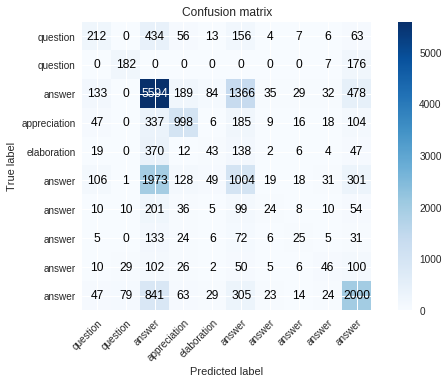

In [0]:
plot_confusion_matrix(test_labels, prediction_pipelinetfq3.predict(test_posts), test_labels, title='Confusion matrix')
plt.show()

In [0]:
def print_errors(labels, predictions, data):
  label_arr=labels.values
  for idx, prediction in enumerate(predictions):
    label=label_arr[idx]
    if prediction != label:
      print(test_posts.iloc[idx,4], label, prediction, "                        " ,'label:', label,"              ", 'prediction:', prediction)
print_errors(test_labels, prediction_pipelinetfq3.predict(test_posts), test_labels)

are you in the USA?  i would say that unless the road says "no stopping unless emergency" or something then you are good to go.  that being said, fully expect a cop to stop and harass you about it.

i moved (from the US) to new zealand and stopped on the side of the desert highway (where you can see Mt Doom from LotR) to take some photos at night, a cop stopped, turned around, and came... and asked if i needed help!  ah, kiwi land =) question answer                          label: question                prediction: answer
Great info! It shows that stopping on a highway should be taken seriously. Those rules were made for a reason. Even tow truck drivers need special certification to work on the side of the highway. Cars and semis are travelling fast and drivers are in a groove. Not to mention at night there will be people dosing and drifting onto the curb. 

I've stopped at night for interesting thunderstorms or car light trails, but it was on country roads. (better light than a highw

##QUESTION FOUR

In [0]:
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

#@Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens
  return normalized_tokens

#@Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

In [0]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class AverageEmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
        self.dimension = 300
        
    def fit(self, X, y):
        return self
      
    def transform(self, X):  
      # Skip OOV terms. 
      # Return 0 for all dimensions if no words are in the vocabulary.
      dense_matrix =  np.array([ 
          np.mean([token.vector for token in self.tokenizer(doc) if not token.is_oov]
                or [np.zeros(self.dimension)], axis=0)
          for doc in X
      ])
      return dense_matrix

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class baseTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
      return None
        
    def fit(self, X, y):
        return self
      
    def transform(self, X):  
      return X[:,np.newaxis]

In [0]:
train_posts["body_length"]= train_posts.apply(lambda row: len((row.body)), axis=1)
test_posts["body_length"]= test_posts.apply(lambda row: len((row.body)), axis=1)


# embedding_vectorizer = AverageEmbeddingTransformer(spacy_tokenize)
# train_embedding_features = embedding_vectorizer.transform(train_posts['body_length'])

Transform is first post in to 1 and 0 

In [0]:
#train_posts["body_length"] = train_embedding_features
# x = list()
# l= list(range(0,len(post_frame1)))

# for i in range(len(post_frame1)):
#   if 'riot' in post_frame1.iloc[i,2]:
#     l[i] = 1
#   elif "Riot" in post_frame1.iloc[i,2]:
#     l[i] = 1
#   elif "LCS" in post_frame1.iloc[i,2]:
#     l[i] = 1
#   elif "lcs" in post_frame1.iloc[i,2]:
#     l[i] = 1
#   elif "jungler" in post_frame1.iloc[i,2]:
#     l[i] = 1
#   elif "laner" in post_frame1.iloc[i,2]:
#     l[i] = 1
#   else: 
#     l[i] = 0
#     #print('Success!')
#   x.append(str(l[i]))  
  
x = list()
l= list(range(0,len(train_posts)))


#   for t in range(len(train_posts)):
    
#     if str(train_posts.iloc[t,8])==True:
#       l[t] = 1
#     else: 
#       l[t] = 0
#       x.append((l[t]))
# x

for i in range(len(train_posts)):
    if 'True' in str(train_posts.iloc[i,8]):
      l[i] = str(1)
    else:
      l[i]=str(0)




train_posts["is_first_post"] =l

In [0]:
x = list()
l= list(range(0,len(test_posts)))

for i in range(len(test_posts)):
    if 'True' in str(test_posts.iloc[i,8]):
      l[i] = str(1)
    else:
      l[i]=str(0)




test_posts["is_first_post"] =l

Adding follow up question - answer 

In [0]:
x12 = list()
l12= ["others"]*len(train_posts)


#   for t in range(len(train_posts)):
    
#     if str(train_posts.iloc[t,8])==True:
#       l[t] = 1
#     else: 
#       l[t] = 0
#       x.append((l[t]))
# x

for i in range(len(train_posts)):
    if "1" in str(train_posts.iloc[i,8]):
      l12[i] = "potential_question"
      l12[i+1]="potential_answer"
      l12[i+2]="others"




#l12
train_posts["follow_posts"] =l12
#train_posts

In [0]:
x2 = list()
l2= ["others"]*len(test_posts)


#   for t in range(len(train_posts)):
    
#     if str(train_posts.iloc[t,8])==True:
#       l[t] = 1
#     else: 
#       l[t] = 0
#       x.append((l[t]))
# x

for i in range(len(test_posts)):
    if "1" in str(test_posts.iloc[i,8]):
      l2[i] = "potential_question"
      l2[i+1]="potential_answer"
      l2[i+2]="others"




#test_posts

test_posts["follow_posts"] =l2


VaderSentiment for double emtion outputs

In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
y = list()
t = list(range(0,len(train_posts)))
d = list(range(0,len(train_posts)))

for i in range(len(train_posts)):
  t[i] = analyzer.polarity_scores(train_posts.iloc[i,4])
  if t[i]['compound'] >= 0.05:
     d[i] = "positive"
      
  elif t[i]['compound'] <=  -0.05:
     d[i] = "negative"
      
  else: 
    d[i] = "neutral"
    #print('Success!')
  y.append(d[i])

  
train_posts["mood"]= y
# post_frame1


In [0]:
y = list()
t = list(range(0,len(test_posts)))
d = list(range(0,len(test_posts)))

for i in range(len(test_posts)):
  t[i] = analyzer.polarity_scores(test_posts.iloc[i,4])
  if t[i]['compound'] >= 0.05:
     d[i] = "positive"
      
  elif t[i]['compound'] <=  -0.05:
     d[i] = "negative"
      
  else: 
    d[i] = "neutral"
    #print('Success!')
  y.append(d[i])

  
test_posts["mood"]= y

Link posts or self wrote 

In [0]:
x = list()
linktrain= list(range(0,len(train_posts)))

for i in range(len(train_posts)):
    if 'www' in (train_posts.iloc[i,4]):
      linktrain[i] = "linkpost"
      
    elif "http:" in (train_posts.iloc[i,4]):
      linktrain[i]= "linkpost"
      
    else:
      linktrain[i]="selfpost"




train_posts["is_link_post"] =linktrain

In [0]:

linktest= list(range(0,len(test_posts)))

for i in range(len(test_posts)):
    if 'www' in (test_posts.iloc[i,4]):
      linktest[i] = "linkpost"
      
    elif "http:" in (test_posts.iloc[i,4]):
      linktest[i]= "linkpost"
      
    else:
      linktest[i]="selfpost"




test_posts["is_link_post"] =linktest

Symbols 

In [0]:

symbols= list(range(0,len(test_posts)))


for i in range(len(test_posts)):
  if '?' in test_posts.iloc[i,4]:
    symbols[i] = "question"
  elif "!" in test_posts.iloc[i,4]:
    symbols[i] = "superise"
  elif ":)" in test_posts.iloc[i,4]:
    symbols[i] = "happy"
  else:
    symbols[i] = "others"
#test_posts["League"]= x1
#test_posts = pd.DataFrame(test_posts)
test_posts["symbols_analysis"]= symbols


symbols= list(range(0,len(train_posts)))

for i in range(len(train_posts)):
  if '?' in train_posts.iloc[i,4]:
    symbols[i] = "question"
  elif "!" in train_posts.iloc[i,4]:
    symbols[i] = "superise"
  elif ":)" in train_posts.iloc[i,4]:
    symbols[i] = "happy"
  else:
    symbols[i] = "others"
train_posts["symbols_analysis"]= symbols


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
labels = ['subreddit', 'title', 'url', 'author', 'body', 'majority_link', 
           'discourse_type', 'in_reply_to']

prediction_pipelinetfq4 = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('subreddit', Pipeline([
              ('selector', ItemSelector(key='subreddit')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,ngram_range=(0,3))), 
              ])),
              
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=True)), 
              ])),
              
              
            ('name', Pipeline([
             ('selector', ItemSelector(key='author')),
             ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
                           #   ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,max_features=None,ngram_range=(1,1))), 

             ])),
              
             ('follow', Pipeline([
             ('selector', ItemSelector(key='follow_posts')),
             ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
                           #   ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,max_features=None,ngram_range=(1,1))), 

             ])),
              

     ##################extra         
               
              ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
#               ('body_length', Pipeline([
#               ('selector', ItemSelector(key='body_length')),
#               ('one-hot', baseTransformer()), 
#               ])),
              

              ('majority', Pipeline([
              ('selector', ItemSelector(key='majority_link')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
              ('reply', Pipeline([
              ('selector', ItemSelector(key='in_reply_to')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
              ('self', Pipeline([
              ('selector', ItemSelector(key='is_self_post')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
              ('first', Pipeline([
              ('selector', ItemSelector(key='is_first_post')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
              ('mood', Pipeline([
              ('selector', ItemSelector(key='mood')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
              ('link', Pipeline([
              ('selector', ItemSelector(key='is_link_post')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
              ('symbol', Pipeline([
              ('selector', ItemSelector(key='symbols_analysis')),
              ('tf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
              
              
        ])

        ),              
        ('logreg', LogisticRegression(solver='saga',C= 1000,multi_class = "multinomial")),

    
    ])

In [0]:

model = prediction_pipelinetfq4.fit(train_posts, train_labels)
evaluation_summary( "LR", prediction_pipelinetfq4.predict(test_posts), test_labels) 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Evaluation for: LR
Classifier 'LR' has Acc=0.579 P=0.388 R=0.484 F1=0.415
                  precision    recall  f1-score   support

       agreement      0.240     0.383     0.295       596
    announcement      0.647     0.744     0.692       317
          answer      0.736     0.595     0.658      9811
    appreciation      0.606     0.683     0.643      1526
    disagreement      0.076     0.199     0.110       246
     elaboration      0.310     0.340     0.325      3311
           humor      0.048     0.198     0.077       111
negativereaction      0.098     0.303     0.148        99
           other      0.306     0.625     0.411       184
        question      0.813     0.771     0.792      3611

       micro avg      0.579     0.579     0.579     19812
       macro avg      0.388     0.484     0.415     19812
    weighted avg      0.633     0.579     0.600     19812


Confusion matrix:
 [[ 228    0  416   60   20  181    8    6    4   28]
 [   0  236    0    0    0    0    0  

##question fourrrrrrrrrrrrrrrrrrrrrrrr

In [0]:
# Define the features
X_train = train_posts["discourse_type"]#features from training data
X_test = test_posts["discourse_type"]#features from test data

from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='stratified',random_state=0)
clf.fit(X_train, train_posts['discourse_type'])
predictions = clf.predict(X_test)  
print(classification_report(predictions, test_posts['discourse_type']))

                  precision    recall  f1-score   support

       agreement       0.05      0.06      0.06       934
    announcement       0.02      0.02      0.02       382
          answer       0.39      0.39      0.39      7910
    appreciation       0.08      0.08      0.08      1603
    disagreement       0.04      0.03      0.04       686
     elaboration       0.19      0.18      0.19      3711
           humor       0.02      0.02      0.02       449
negativereaction       0.03      0.03      0.03       297
           other       0.02      0.02      0.02       395
        question       0.17      0.17      0.17      3445

       micro avg       0.23      0.23      0.23     19812
       macro avg       0.10      0.10      0.10     19812
    weighted avg       0.23      0.23      0.23     19812

